# CP1 Blatt4 Abgabe Lapp & Brieden
#### erstellt von Tobias Lapp und Sven Brieden am 20.11.2017

# Aufgabe 4.1 Prandtl-van Karman law

Function for friction factor: $f= g(f)=\dfrac{1}{(0.88*ln(Re\sqrt f)-0.81)^2}$

the derivative: g'(f)$=\dfrac{-1}{\pm f*(0.88*ln(Re\sqrt f)-0.81)^3}$

In [2]:
def factor_f(f0,re,acc):
    df = 100000     #Initailisierung für while()-Bed
    dif_gf=0
    
    while (dif_gf<1 and df>acc):
        f_np1 = 1/((0.88*math.log(re*math.sqrt(f0))-0.81)**2) # f=g(f)
       
        dif_gf= math.fabs(1/(f_np1*(0.88*math.log(re*math.sqrt(f_np1))-0.81)**3))#f=g'(f)
        df=math.fabs(f_np1-f0)     #Check Abbruch
        
        f0=f_np1                 # Wert zuweisen für nächste Iteration
        #print(f_np1,dif_gf) #Check Werte
    return f_np1

acc = 0.00001 #Genauigkeit f
step = 100    #Schrittweite
re_dat= np.arange(10**2,10**8,step)

f0_turb = 0.64 #Anfangswert f
#print(factor_f(f0_turb,100,acc))
values_turb = np.array([factor_f(f0_turb,re_,acc)for re_ in re_dat])

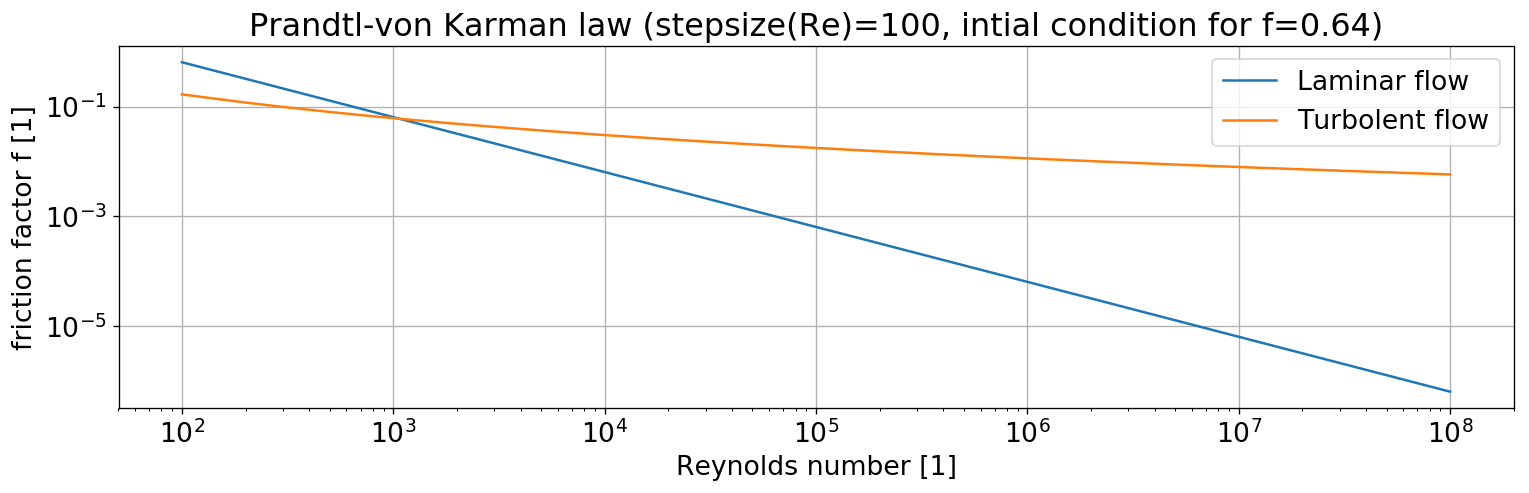

In [3]:
plt.loglog(re_dat,64/re_dat,label="Laminar flow")
plt.loglog(re_dat,values_turb,label="Turbolent flow")

plt.xlabel('Reynolds number [1]')
plt.ylabel('friction factor f [1]')                       
plt.legend(loc='upper right')                      
plt.title('Prandtl-von Karman law (stepsize(Re)=100, intial condition for f=0.64)')
plt.grid(True)      
plt.show()

Another way of determining the curve f(Re) is to use the Colebrook equation:

$\dfrac{1}{\sqrt{f}}=-2*log(\frac{2.51}{Re*\sqrt{f}}+\frac{k}{3.72 d_{h}})$

$d_{h}$: Hydraulic diameter

$k$: Roughness of the pipe

$Re$: Reynold number

# Aufgabe 4.2. Lagrange points

$H = \dfrac{p^2_x + p^2_y }{2} − xp_y + yp_x − \dfrac{m_1}{\sqrt{(x + m_2 )^2 + y^2}}-\dfrac{m_2}{\sqrt{(x − m_1 )^2 + y^2}}$

is composite with the follering parts:
 - with force on particle i: $\vec{F_i} = -G \sum^N_{j=1} \dfrac{m_i m_j}{|\vec{r_j}-\vec{r_i}|^3}(\vec{r_j}-\vec{r_i}) = -\vec{\nabla}_{\vec{r}_i}V
$ 
 - the following potential appears on paricle i: $V = -G \sum_{i<j} \dfrac{m_i m_j}{|\vec{r_j}-\vec{r_i}| }=
 -G\left( \dfrac{m_i m_1}{|\vec{r_1}-\vec{r_i}| }+  \dfrac{m_i m_2}{|\vec{r_2}-\vec{r_i}|}\right)$
 
 - ${\displaystyle {\frac { p ^{2}}{2\,m}}}$ or in our case with special units ${\displaystyle {\dfrac{p^2_x + p^2_y }{2}}}$ discribes the  kinetic energy


# Aufgabe 3.3. Residuals

In [4]:
A = np.array([[1.2969, 0.8648],[0.2161, 0.1441]])
x = np.array([0.9911,-0.4870])
b = np.array([0.8642,0.1440])
x_calculated = np.linalg.lstsq(A,b)[0]
print(" residual with given values :", np.dot(A,x.T)-b,
      "\n residual with calculated x :", np.dot(A,x_calculated.T)-b,
      "\n with LU-decomposition we get the x:", x_calculated)

 residual with given values : [ -1.00000002e-08   1.00000000e-08] 
 residual with calculated x : [ -1.11022302e-16   2.77555756e-17] 
 with LU-decomposition we get the x: [ 2. -2.]


Beide Residuen sind sehr klein, aber das Residuum mit berechnetem x-Vektor ist nochmals 8 Größenordungen kleiner. Das neu berechnet x ist genauer und liegt bei der Maschinengenauigkeit. 

# Aufgabe 4.4: Powers of Integers

In [5]:
#                         LGS der Form: Ax=b
#     (Exponent,Basis)
def vektor_b(k,N): # gibt die einzelnen akkumulierten Teilsummen aus, für LGS als Vektor b
    n=1
    erg_sigma=[[0 for el in range(1) ]for zeilen in range(0,N,1)]
    sigma=0
    while n<=N:
        summand = n**k
        sigma=sigma+summand
        erg_sigma[n-1][0]=sigma
        n=n+1
    return erg_sigma    # Elemente von der Liste erg_sigma über erg_sigma[0,1,2...] ansprechen


#print(sum(2,3))

def matrix_A(k,N):
    
    mat_a=[[0 for zeilen in range(0,N,1)]for spalten in range(0,k+1,1)]
    
    for n in range(1,N+1,1):
        for l in range(1,k+2,1):
            pot= n**l
            mat_a[n-1][l-1]=pot    # Auf Dimension achten, da solver sonst falsch berechnet
                                   # ACHTUNG darstellung als Liste!!!
    return mat_a       
  

# Für jedes k eine zeile von koeffizienten

k_lauf=7 # Berechnung für Potenzen bis k


for k in range(1,k_lauf+1,1):
    N=k+1
    print('\n For k = %i'%k)
    vector_ck =solve(matrix_A(k,N),vektor_b(k,N))
    
    r= np.dot(matrix_A(k,N),vector_ck)-vektor_b(k,N)
    print("Residual r = \n",r)
    print('Vector of c1 to ck+1 = \n',vector_ck)
    
    cond = np.linalg.cond(matrix_A(k,N),p=2)   #np.linal.con(A,p=...) Kondition einer Matrix 
                                               # p=2 für 2-er Norm -> largest singular Value
    print('Condition of the Matrix A =\n %f'%cond)


 For k = 1
Residual r = 
 [[ 0.]
 [ 0.]]
Vector of c1 to ck+1 = 
 [[ 0.5]
 [ 0.5]]
Condition of the Matrix A =
 10.908327

 For k = 2
Residual r = 
 [[  4.44089210e-16]
 [  0.00000000e+00]
 [  0.00000000e+00]]
Vector of c1 to ck+1 = 
 [[ 0.16666667]
 [ 0.5       ]
 [ 0.33333333]]
Condition of the Matrix A =
 141.235621

 For k = 3
Residual r = 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Vector of c1 to ck+1 = 
 [[ 0.  ]
 [ 0.25]
 [ 0.5 ]
 [ 0.25]]
Condition of the Matrix A =
 2501.238500

 For k = 4
Residual r = 
 [[ -4.34097203e-14]
 [ -1.77635684e-14]
 [  0.00000000e+00]
 [ -5.68434189e-14]
 [  0.00000000e+00]]
Vector of c1 to ck+1 = 
 [[ -3.33333333e-02]
 [  2.30926389e-14]
 [  3.33333333e-01]
 [  5.00000000e-01]
 [  2.00000000e-01]]
Condition of the Matrix A =
 56895.788056

 For k = 5
Residual r = 
 [[ -1.30340183e-13]
 [ -4.68958206e-13]
 [  0.00000000e+00]
 [ -2.27373675e-13]
 [ -9.09494702e-13]
 [  0.00000000e+00]]
Vector of c1 to ck+1 = 
 [[  2.40918396e-12]
 [ -8.33333333e-02]
 [  3.2812